### Using PCA to improve the performance of MLP.

Attribute Information:

1) ID number

2) Recurrance 

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.


First we import the required datasets and do some data cleaning and then generate a logistic regression model to 
(A) serve as baseline to compare with an MLP model
(B) to compute the coefficients inorder to identify patterns in nuclear morphology that are indicative of high risk of recurrance of breast cancer.

Next I used PCA to identify the 9 principle components that use reduce the number of dimensions inputed from 24 to 9. These 9 components which are linear combinations of the 24 initial features, explain 90 percent of the variance of the original dataset.
Using PCA's component function, i then try to identify the 3 main contributors to each of the 9 newly generated components to see if they match up with the coefficients of the logistic regressions calculated earlier. This insight will be the compared to the clinical literature to see if pathologists use the same criteria to evaluate recurrence and if not, my work could improve the criteria and predictive abilities in clinical practice.

I then build a MLP model and train it on the 32 featured data set ad get an f1 score of .76. I then train the same model on 9 component PCA transformed data. The f1 had dropped to 0.68. I was expecting it to increase . Maybe using a higher component PCA to feed into the MLP may hav better results.





### 1. Data description
We first import the relevant packages and load the dataset. We do some basic data exploration during which we find some missing values (?)  in the lymph node column.


In [1]:
import pandas as pd, numpy as np , seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = 'D:\DATA SCIENCE\DS PROJECTS\proj 3\wpbc.csv'
data = pd.read_csv(filepath,sep =',')

In [3]:
data.dtypes
data.dtypes.value_counts()

float64    31
int64       2
object      2
dtype: int64

In [4]:
data.describe()

,id,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000


In [5]:
data.head()

,id,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor Size,Lymph node status,Recurrence
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.1,N
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2,N
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0,N
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0,N
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0,R


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   Time                     198 non-null    int64  
 2   radius_mean              198 non-null    float64
 3   texture_mean             198 non-null    float64
 4   perimeter_mean           198 non-null    float64
 5   area_mean                198 non-null    float64
 6   smoothness_mean          198 non-null    float64
 7   compactness_mean         198 non-null    float64
 8   concavity_mean           198 non-null    float64
 9   concave points_mean      198 non-null    float64
 10  symmetry_mean            198 non-null    float64
 11  fractal_dimension_mean   198 non-null    float64
 12  radius_se                198 non-null    float64
 13  texture_se               198 non-null    float64
 14  perimeter_se             1

### 2. Data cleaning
These ?  are replaced with nan and then these rows are then dropped. The id number is also dropped as it has no significance in predicting recurrence. The recurrence values are strings R and N and we therefore use label binarizer to convert them to 0 and 1s.


In [7]:
data =data.drop(['id','Time'],axis=1)

binarize =['Recurrence']
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
for column in binarize:
    data[column] = lb.fit_transform(data[column])
    
data = data.replace('?', np.nan)
data.dropna(inplace=True)


### 3.Data exploration

We look at the correlation of all the features with the dependent variable ( recurrence ) and we can see that compactness and smoothness have a low correlation with breast ca recurrence.
What is time.?
The worst or highest nucleus radius, area and perimeter observed in a slide along with the mean values for the earlier mentioned parameters have a strong positive correlation with recurrence. This makes clinical sense as nuclear polymorphism is indicative of carcinoma.
Whereas fractal dimension which indicates roughness or complexity in the border of nucleus and symmetry of the nucleus seems protective.


In [8]:
y= data['Recurrence']
fields = list(data.columns[:-1])
corr = data[fields].corrwith(y)
corr.sort_values(inplace= True)
corr

fractal_dimension_mean    -0.120151
symmetry_mean             -0.101712
texture_se                -0.077835
concave points_se         -0.077726
concavity_se              -0.071108
texture_mean              -0.069888
symmetry_worst            -0.062130
smoothness_se             -0.059774
fractal_dimension_worst   -0.053887
texture_worst             -0.051249
fractal_dimension_se      -0.048354
symmetry_se               -0.040898
compactness_worst         -0.023835
compactness_se            -0.016591
compactness_mean          -0.011520
concavity_worst            0.012775
smoothness_mean            0.012789
smoothness_worst           0.035943
concavity_mean             0.041231
concave points_worst       0.067958
concave points_mean        0.103772
radius_se                  0.115318
perimeter_se               0.121759
area_se                    0.135859
radius_mean                0.163639
perimeter_mean             0.164672
Tumor Size                 0.173139
area_mean                  0

In [9]:
data =data.drop([ 'compactness_worst', 'compactness_se' ,'compactness_mean' ,'concavity_worst' ,'smoothness_mean' ,'smoothness_worst' ],axis=1)


In [58]:
x_col = data.columns[:-1]

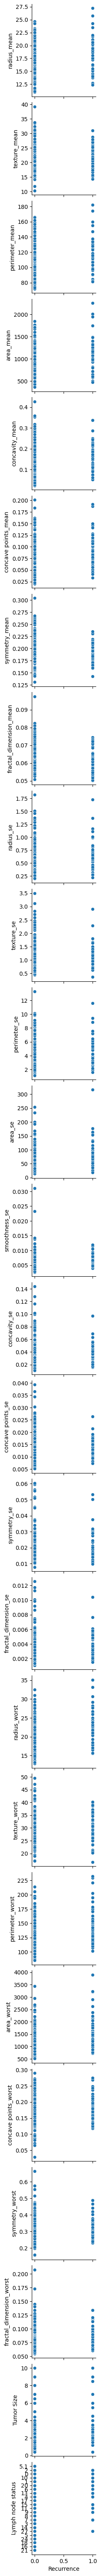

In [69]:
sns.pairplot(data=data, y_vars= x_col, x_vars=['Recurrence'])

### 4. Pre processing

We look at the frequency of the independent variable. We see an imbalanced data set. Attempts to use class weights to fix this in mpl have been unsucessful so far.

We then split the data into dependent and independent variables, we then use standard scalar to standardize the date. Next we divide the data into test and train sets. 



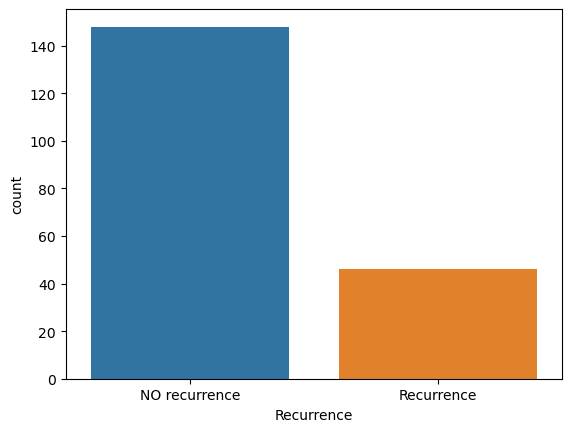

In [11]:
import warnings
warnings.filterwarnings("ignore")
data['Recurrence'].value_counts()
plot1 = sns.countplot(data['Recurrence'])
plot1.set_xticklabels(['NO recurrence','Recurrence'])
plt.show()

In [12]:
y = data['Recurrence']
x = data[data.columns[:-1]]

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.19525303,  1.22546081,  0.12717922,  0.12464985, -0.6742506 ,
        -0.47993529, -0.23126324,  0.08078597,  0.06758118,  1.17095964,
        -0.13156742,  0.02623066, -0.79262314, -0.41089092, -0.96162794,
        -0.38184876, -0.26191805,  0.15090023,  1.1400542 , -0.01519548,
         0.05848299, -1.35315352, -0.73839436, -0.45256316,  1.09607526,
         0.34547806],
       [ 0.18576982, -2.75686661,  0.37512792,  0.090583  ,  2.03212882,
         1.77986102,  1.77545788,  2.19630931,  1.5885731 , -0.69999136,
         1.986189  ,  1.73514643, -0.13326817,  0.61193255,  0.13043836,
         0.98045376,  1.12520797,  1.03643635, -2.12326631,  1.54641051,
         1.05416933,  1.91471481,  1.86592704,  1.31933223,  0.06809073,
        -0.22173599],
       [ 1.25421108, -1.12415862,  1.06283472,  1.1466554 , -0.43541085,
        -0.14782936,  1.46394522, -0.36350144, -0.06021967, -1.26011765,
        -0.15174963,  0.24754413, -0.21107608, -0.37886795,  0.52616717,
       

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =12)


### 5. Model building

We first build a logistic regression model to serve as a baseline. Hyperparameter tuning was performed using gridsearch cv and obtained a f1 score of .69. We then look at the coefficients to see which of the factors contribute the most towards recurrence. We can then compare it with the correlations identified earlier.


In [15]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights = dict(enumerate(class_weights))




In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


lr = LogisticRegression()
param_grid = [{'penalty': ['l1','l2','elasticnet','none'] , 'C': np.logspace(-4,4,9) , 'max_iter': [100,1000,2000,5000], 'class_weight' : [class_weights] }]

lrmodels = GridSearchCV( lr ,param_grid = param_grid,scoring='f1', cv=3, n_jobs =-1)
lrmodels.fit(x_train, y_train)
lrmodels.best_score_,lrmodels.best_params_

(0.501311249137336,
 {'C': 0.001,
  'class_weight': {0: 0.6553398058252428, 1: 2.109375},
  'max_iter': 100,
  'penalty': 'l2'})

In [17]:
lrmodels.best_estimator_.coef_
coef_table = pd.DataFrame(list(data.columns[:-1])).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lrmodels.best_estimator_.coef_.transpose())
coef_table_desc = coef_table.sort_values(['Coefs'], ascending=[False])
coef_table_desc

,0,Coefs
20,area_worst,0.017205
25,Lymph node status,0.016999
17,radius_worst,0.016780
19,perimeter_worst,0.016307
3,area_mean,0.015185
24,Tumor Size,0.014317
2,perimeter_mean,0.014316
0,radius_mean,0.014164
5,concave points_mean,0.008354
11,area_se,0.007474


In [18]:
yhat = lrmodels.predict(x_test)
yhat_prob = lrmodels.predict_proba(x_test)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        45
           1       0.23      0.21      0.22        14

    accuracy                           0.64        59
   macro avg       0.50      0.50      0.50        59
weighted avg       0.64      0.64      0.64        59

Area under the curve is
0.5047619047619047


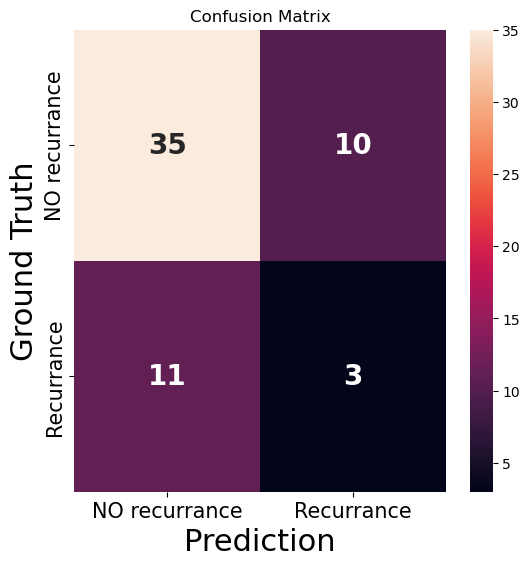

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  roc_auc_score,f1_score

print (classification_report(y_test, yhat))
auc = roc_auc_score(y_test, yhat_prob[::,1], average='weighted')
print("Area under the curve is" )
print(auc)
cm= confusion_matrix(y_test, yhat)
fig, ax = plt.subplots(figsize=(6,6))  
ax.set(title = "Confusion Matrix")
sns.heatmap(cm,annot =True,ax=ax, annot_kws={"size":20,"weight":"bold"})
labels=["NO recurrance","Recurrance"]
ax.set_xticklabels(labels,fontsize =15);
ax.set_yticklabels(labels,fontsize =15);
ax.set_ylabel('Ground Truth',fontsize =22);
ax.set_xlabel('Prediction',fontsize =22);



Next we import pca and train multiple models with components ranging from 1 to 15 and check the total amount of variability explained by each of the models. We find that 90 percent of the variability of the original data.


In [20]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

In [21]:
for n in range (1,15):
    PCAmod =PCA(n_components=n)
    PCAmod.fit(x_train)
    
    pca_list.append(pd.Series({'n':n,'model':PCAmod,'var': PCAmod.explained_variance_ratio_.sum()})) 

In [22]:
pca_df = pd.concat(pca_list,axis =1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.368457
2,PCA(n_components=2),0.557076
3,PCA(n_components=3),0.676854
4,PCA(n_components=4),0.755123
5,PCA(n_components=5),0.806077
6,PCA(n_components=6),0.852106
7,PCA(n_components=7),0.887425
8,PCA(n_components=8),0.910447
9,PCA(n_components=9),0.927366


We then use the .components attribute to look into how much each of the original features contribute to the newly generated 9 components. We then take the absolute values of these metrics and look at the 3 most significant contributors to each of the 9 newly generated components. Symmetry, tumor size, smoothness , lymph node status seems to be contributing the most to these new components.


In [24]:
PCA9 =PCA(n_components=9)
PCA9.fit(x_train)
PCA9.components_
print(pd.DataFrame(PCA9.components_,columns=data.columns[:-1],index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9']))


      radius_mean  texture_mean  perimeter_mean  area_mean  concavity_mean  \
PC-1     0.287943      0.047997        0.297603   0.296760        0.244352   
PC-2    -0.129782      0.010617       -0.102013  -0.133068        0.247580   
PC-3    -0.050150      0.126567       -0.057173  -0.053657       -0.108026   
PC-4    -0.026018      0.619657       -0.023838  -0.020767        0.026391   
PC-5     0.073595      0.137068        0.084656   0.059480        0.138806   
PC-6     0.071532     -0.011487        0.077149   0.059865        0.104284   
PC-7     0.190794      0.015196        0.165783   0.164132       -0.000864   
PC-8     0.009258     -0.141359        0.026865  -0.015306        0.291904   
PC-9    -0.036440     -0.259726       -0.030063   0.005820        0.071128   

      concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
PC-1             0.280267       0.060193               -0.017260   0.274285   
PC-2             0.149711       0.304834                0.355

In [25]:
PCA_comp_abs= abs(PCA9.components_)

In [26]:
for row in range (PCA_comp_abs.shape[0]):

    temp= np.argpartition(-(PCA_comp_abs[row]),3)
    indices = temp[np.argsort((-PCA_comp_abs[row])[temp])][:3]
    print(f'Component {row}:{data.columns[:-1][indices].to_list()}')

Component 0:['perimeter_mean', 'area_mean', 'area_se']
Component 1:['fractal_dimension_se', 'fractal_dimension_mean', 'concavity_se']
Component 2:['texture_se', 'symmetry_worst', 'smoothness_se']
Component 3:['texture_worst', 'texture_mean', 'texture_se']
Component 4:['Tumor Size', 'Lymph node status', 'radius_se']
Component 5:['Tumor Size', 'symmetry_se', 'symmetry_mean']
Component 6:['symmetry_se', 'fractal_dimension_mean', 'symmetry_worst']
Component 7:['concave points_mean', 'texture_se', 'fractal_dimension_se']
Component 8:['concave points_se', 'Lymph node status', 'Tumor Size']


Next we build a MPL deep learning model with 5 hidden layers using scikit learn and train it on the original dataset to get a f1 score of 0.73. Next we try using the 9 components generated from pca to train the sane MPL model but the f1 score has dropped to 0.61. In cases where the number of features are high , i.e around 100 to 200, pca may improve the performance of the model but when the number of features are relatively low i.e around 32 , pca seems to have a detrimental effect. 


In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier ( hidden_layer_sizes = (512,265,128,64,32,16), activation ='relu')

In [28]:
mlp.fit(x_train,y_train)
ypred =mlp.predict(x_test)

In [29]:
print (classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.30      0.21      0.25        14

    accuracy                           0.69        59
   macro avg       0.54      0.53      0.53        59
weighted avg       0.66      0.69      0.68        59



In [30]:
x_train_pca = PCA9.transform(x_train)
x_test_pca = PCA9.fit_transform(x_test)

In [31]:
mlp_pca = MLPClassifier ( hidden_layer_sizes = (512,265,128,64,32,16), activation ='relu')

In [32]:
mlp_pca.fit(x_train_pca ,y_train)
ypred_pca =mlp_pca.predict(x_test_pca)

In [33]:
print (classification_report(y_test, ypred_pca))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82        45
           1       0.33      0.21      0.26        14

    accuracy                           0.71        59
   macro avg       0.56      0.54      0.54        59
weighted avg       0.67      0.71      0.69        59



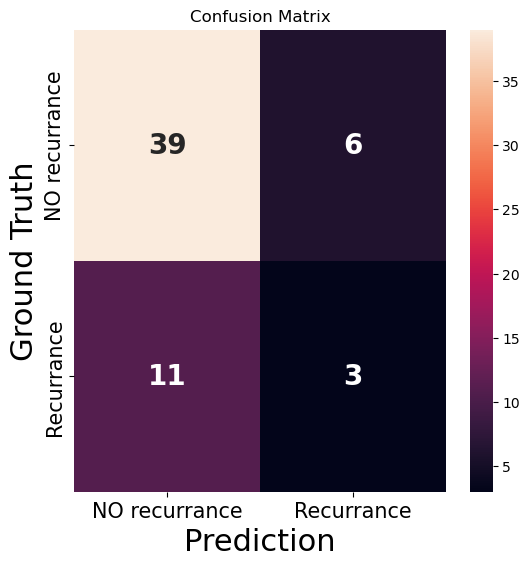

In [34]:
cm= confusion_matrix(y_test,ypred_pca)
fig, ax = plt.subplots(figsize=(6,6))  
ax.set(title = "Confusion Matrix")
sns.heatmap(cm,annot =True,ax=ax, annot_kws={"size":20,"weight":"bold"})
labels=["NO recurrance","Recurrance"]
ax.set_xticklabels(labels,fontsize =15);
ax.set_yticklabels(labels,fontsize =15);
ax.set_ylabel('Ground Truth',fontsize =22);
ax.set_xlabel('Prediction',fontsize =22);


Changes would like to make, 

(1) change pairplot to boxplot ,it would improve comprehesion but I was unable to do so due to vague errors. 

(2) use a combination of over and undersampling to balance the data , or use class balance in MPL . Keep getting error mesages related to balanced class generator in keras, when trying to install imblearn.
